<a href="https://colab.research.google.com/github/tbonne/IntroPychStats/blob/main/notebooks/lm_infants_gaze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1786XAc5VlhzIHic3-cELNs5f1SQeFZe3' width=400>

#<font color='darkorange'>Asking and answering questions using Linear Regression</font>

In this notebook we'll use the infant dataset to ask and answer specific questions.


### 1. Load in the data

Lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [ ]:
install.packages("jtools")
install.packages("ggstance")
library(jtools)

Then let's load in the [infant dataset](https://osf.io/bu7rx). You can find the [full paper here](https://journals.sagepub.com/doi/full/10.1177/0956797615626691).

In [ ]:
#here we will read in a csv file and place it into something called df
df_infant <- read.csv("https://raw.githubusercontent.com/tbonne/IntroPychStats/main/data/LUL_pss_small.csv", header = T)

#let's take a look at the data
head(df_infant)

The first two columns are particualrly interesting. The first column shows us the proportion of the time the infant gazed at one of the two individuals presented on a screen. The second column shows us the proportion of the time the infant gazed at the one who sang the familar song. The difference then tells us how signing the familar song changed the infants gaze. 

### 2. Visualize our data

Let's plot the scatterplot. Here we will choose: 
> What we'd like to predict and put it on the y-axis.

> What we'd like to use to help make those predictions and put it on the x-axis.


**Histogram**

Histograms are a great way to see how a numeric variable is distributed.
  
<font color = "darkred"> (?) for the question mark below you should replace it with the column name that you'd like to use for the histogram.  </font>

In [ ]:
hist(df_infant$diff)

**Scatterplot**

Scatterplots are a great way to explore the relationships between two variables.
  
<font color = "darkred"> (?) for the first question mark below you should replace it with the column name that you'd like to use to make predictions. For the second question mark you should replace it with the variable you'd like to predict. </font>

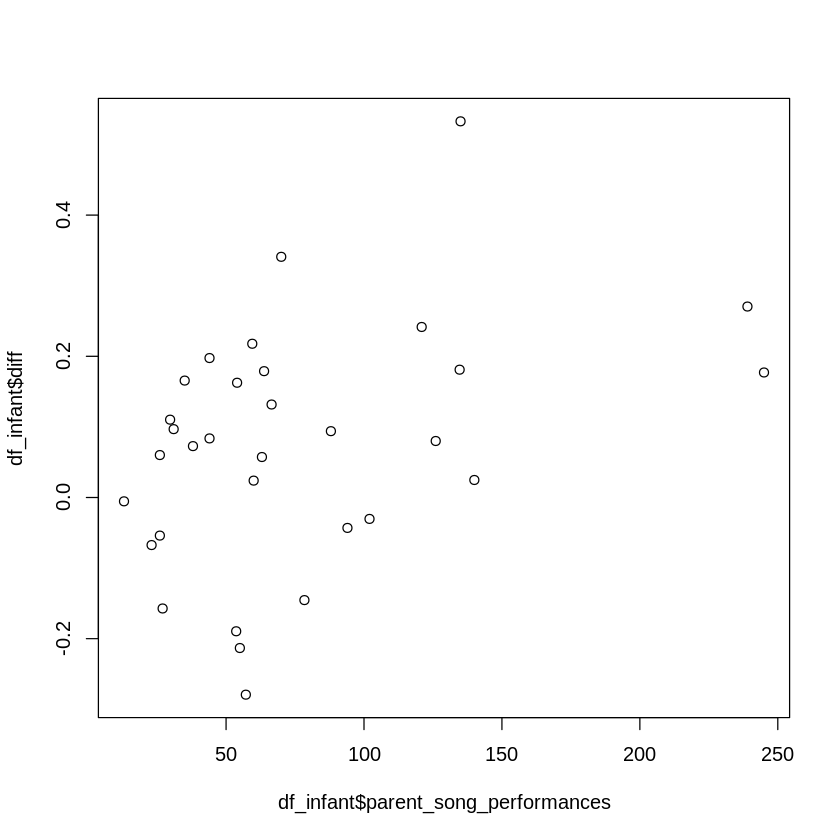

In [26]:
plot(x=df_infant$parent_song_performances,y=df_infant$diff) 

**Boxplot**

Boxplots are a great way to see how a numeric variable is distributed within certain categories.
   
<font color = "darkred"> Replace the first question mark with the categorical variable, and the second question mark with the variable you'd like to predict. </font>

In [ ]:
plot(x=factor(df_infant$female),y=df_infant$diff) 

### 3. Define and fit our model

Now we can speficy the model we'd like to fit.
> Remember, here we use the formula: "what we'd like to predict" ~ "what we'd like to use to help make those predictions."

> Remember too that to write this formula you should use the column names in the dataframe above (watch for spelling mistakes, and upper/lower case letters)

> If you don't have any variables you'd like to use to help you make predictions you can write "what we'd like to predict" ~ 1. This will estimate the mean value of what you are trying to predict and give you an estimate of the uncertainty in that mean (i.e., 95% confidence interval).
  

<font color = "darkred"> (?) for the question mark below you should replace it with the formula that will help you answer your question. </font>

In [ ]:
#fit a linear model
model_infant <- lm(?, data=df_infant)


This bit of code then use our inputs to find the best fit linear equation for :
> y = a + b * x

Let's use the summ function to tell us what values of a and b it found for the best fit line. 

> Note: we'll also calculate our 95% confidence interval here too!

In [ ]:
#What does the best fit model look like?
summ(model_infant, confint=TRUE, scale = TRUE, ci.width = .95)

### 4. Visualize the results

Let's take a look at the estimates a little more visually

In [ ]:
#plot the estimates of the slopes
plot_summs(model_infant, scale=TRUE, ci_level = .95)

Let's take a look at the regression line a little more visually

In [ ]:
#plot line on the data
effect_plot(model_infant, pred = ?, interval = TRUE, plot.points = TRUE)

### 5. Checking assumptions

**Assumption 1**

Let's check the assumption that the errors (residuals) are normally distributed.

In [ ]:
hist(model_infant$residuals)

The above plot is just like the histograms we've looked at in the past. Now we are looking at how errors are distributed.

> If the errors do not look to have many small errors and few large errors (both positive and negative) then a normal distribution might not be the best model of the data. We might also be missing an important variable...

**Assumption 2** - no patterns in the residuals
  
Let's check the assumption that the variance in the errors is constant.

In [ ]:
plot(y=model_infant$residuals, x=model_infant$fitted.values)
abline(h = 0, lty=3)

**Assumption 2** - no patterns in the residuals
   
Let's check the assumption that the relationship between your variables is linear (i.e., that a straight line and not a curvy line fit the data best). We can see this intuatively in the origianl scatter plot, or we can look at the residuals!

In [ ]:
plot(y=model_infant$residuals, x=model_infant$fitted.values)
abline(h = 0, lty=3)

There are two things to keep in mind when checking the assumptions of the linear regression.

> The first is that the assumptions do not need to be perfect to give you a resonable estimate.

> The second is that often the way the model fails can help you build a better model.

### 6. Interpret the results

From the results above you can start to answer some of the following questions: 

> What is the association between the two variables that you tested?

> What does the confidence interval tell you about how certain you are in the sign and magnitude of that association?

> How "good" are your model predictions?
    